# Design discussions LDA Mallet Implementation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
SO_tag_filtered_nocode = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/clean_compl_data4.csv")
SO_tag_filtered_nocode = SO_tag_filtered_nocode.loc[SO_tag_filtered_nocode['label'] == 1]  # select only bugs records
SO_tag_filtered_nocode.head()

,Unnamed: 0,text,label
0,0,zoom piano roll zoom piano roll would useful,1
2,2,auto update feature great job far saenz ramiro auto update feature would nice alternatively menu button check latest version manually,1
3,3,filter noisy endpoint log think stop logging request health gtg favicon ico,1
6,6,add translation beta release electron beta electron electron http git hub beta,1
8,8,bot post listing periodically instead posting startup post bot stats called bot connects discord meaning server count update bot loses connection discord,1


In [ ]:
#checkpoint
#save csv with limited columns
SO_tag_filtered_nocode['Id'] = SO_tag_filtered_nocode.index
SO_tag_filtered_nocode.to_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_text_processed.csv", columns=['Id','text'],index=False)

In [ ]:
SO_tag_filtered_nocode = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_text_processed.csv")
SO_tag_filtered_nocode.head()

,Id,text
0,0,zoom piano roll zoom piano roll would useful
1,2,auto update feature great job far saenz ramiro auto update feature would nice alternatively menu button check latest version manually
2,3,filter noisy endpoint log think stop logging request health gtg favicon ico
3,6,add translation beta release electron beta electron electron http git hub beta
4,8,bot post listing periodically instead posting startup post bot stats called bot connects discord meaning server count update bot loses connection discord


# dataset visualizations

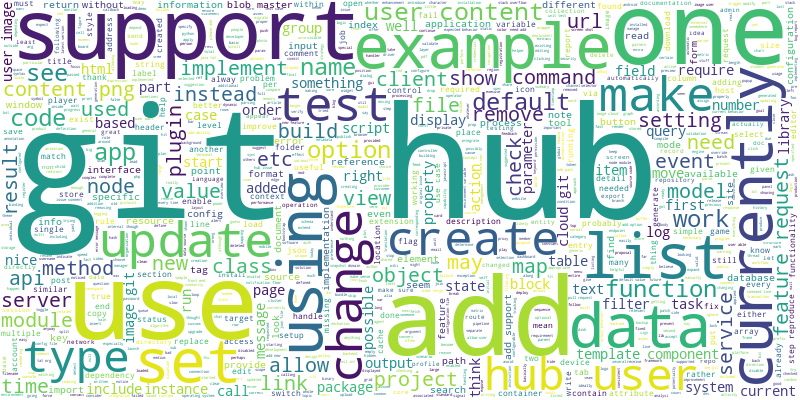

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(SO_tag_filtered_nocode['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

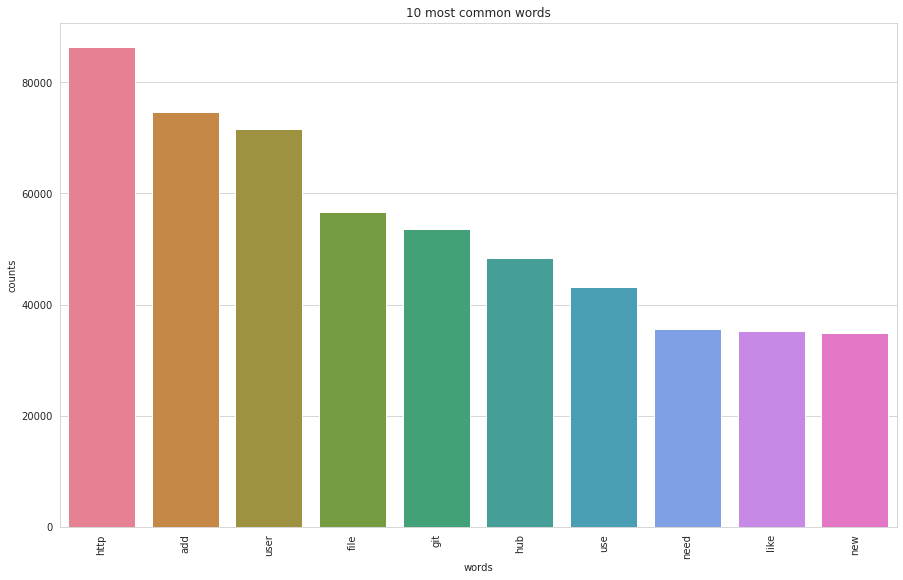

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(SO_tag_filtered_nocode['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# sklearn default implementation of LDA Mallet

In [ ]:
#benchmark - no need to run
# the sklearn default implementation of LDAMallet
%%time

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, verbose = True)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Topics found via LDA:

Topic #0:
value type function add set class string use object like

Topic #1:
user http add page image hub git content button issue

Topic #2:
file git http hub version command build add use package

Topic #3:
data add table map model filter list column need item

Topic #4:
http test error api server service request com support client
CPU times: user 26.7 s, sys: 2.03 s, total: 28.7 s
Wall time: 31min 19s


# Generating bi-grams and tri-grams

In [ ]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data_words = list(sent_to_words(SO_tag_filtered_nocode.text))

print(data_words[:1])

[['zoom', 'piano', 'roll', 'zoom', 'piano', 'roll', 'would', 'useful']]


In [ ]:
#checkpoint 

import pickle
#pickle.dump(data_words,'/content/drive/MyDrive/Research/ICSME 2021/SO_data_words.pkl')

#saving data words
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_words.pkl', 'wb') as handle:
    pickle.dump(data_words, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip install pyLDAvis

#frm here

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#opening saved data words.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_words.pkl', 'rb') as handle:
    data_words = pickle.load(handle)
# data_words

In [ ]:
import pyLDAvis
# import pyLDAvis.gensim_models
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

bigram = gensim.models.Phrases(data_words, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# checkpoint
bigram_mod.save('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_bigram_mod')
trigram_mod.save('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_trigram_mod')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/sm

In [ ]:
# LOAD
bigram_mod = gensim.models.phrases.Phraser.load('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_bigram_mod')
trigram_mod = gensim.models.phrases.Phraser.load('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_trigram_mod')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


# lemmetization

In [ ]:
# stopwords
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']
import re

data_processed = []
stop_words = nltk.corpus.stopwords.words('english')

# bi-gram and tri-gram implementation
texts = [bigram_mod[doc] for doc in data_words]
texts = [trigram_mod[bigram_mod[doc]] for doc in data_words]

texts_out = []
# implement lemmatization and filter out unwanted part of speech tags
for sent in texts:
  doc = nlp(" ".join(sent)) 
  texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
# remove stopwords and short tokens again after lemmatization
texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out] 

data_ready = texts_out
data_ready

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

[['would', 'useful'],
 ['auto',
  'update',
  'feature',
  'great',
  'job',
  'far',
  'auto',
  'update',
  'feature',
  'would',
  'nice',
  'alternatively',
  'menu',
  'button',
  'check',
  'late',
  'version',
  'manually'],
 ['think', 'stop', 'log', 'request', 'health', 'gtg'],
 ['add', 'translation', 'beta', 'release', 'http', 'beta'],
 ['bot',
  'post',
  'list',
  'periodically',
  'instead',
  'post',
  'startup',
  'post',
  'bot',
  'stat',
  'call',
  'bot',
  'connect',
  'discord',
  'meaning',
  'update',
  'bot',
  'lose',
  'connection',
  'discord'],
 ['launcher',
  'check',
  'result',
  'training',
  'datum',
  'want',
  'able',
  'run',
  'algorithm',
  'datum',
  'split',
  'training',
  'validation',
  'set',
  'want',
  'able',
  'see',
  'potential',
  'result',
  'task',
  'comprise',
  'whole',
  'pipeline'],
 ['custom',
  'averaging',
  'browser',
  'able',
  'select',
  'file',
  'average',
  'select',
  'type',
  'averaging',
  'may',
  'option'],
 ['ad

In [ ]:
# from nltk.stem import WordNetLemmatizer

# wnl = WordNetLemmatizer()
# data_processed = []
# stop_words = nltk.corpus.stopwords.words('english')
# for doc in data_words:
#     doc_out = []
#     for wd in doc:
#         if wd not in stop_words:  # remove stopwords
#             lemmatized_word = ""
#             lemmatized_word = wnl.lemmatize(wd)  # lemmatize
#             if lemmatized_word:
#                 doc_out.append(lemmatized_word)
#         else:
#             continue
#     data_processed.append(doc_out)
# data_ready = data_processed


In [ ]:
#checkpoint
#saving lemmetize
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready.pkl', 'wb') as handle:
    pickle.dump(data_ready, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready.pkl', 'rb') as handle:
    data_ready = pickle.load(handle)
# data_ready

# vocabulary

In [ ]:
# print vocab
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 45715


In [ ]:
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# checkpoint
# saving corpus
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'wb') as handle:
    pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'rb') as handle:
    corpus = pickle.load(handle)

In [ ]:
import pandas as pd
# creating a dictionary corpus
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq
       
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

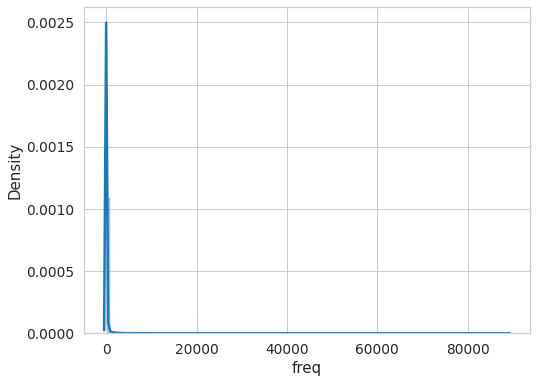

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [ ]:
dict_df.sort_values('freq', ascending=False).head(10)

,freq
add,88900
use,81273
user,59338
would,55482
file,55395
http,44502
create,37116
make,36895
support,34766
need,33565


In [ ]:
# !pip install --upgrade pip

In [ ]:
extension = dict_df[dict_df.freq>5000].index.tolist()

In [ ]:
#checkpoint
#saving extension
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_extension.pkl', 'wb') as handle:
    pickle.dump(extension, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_extension.pkl', 'rb') as handle:
    extension = pickle.load(handle)

In [ ]:
# to filter words greater then 1500 freq 
ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
id2word.filter_tokens(bad_ids=ids)

# removing stopwords and outliers and frequent words to reduce vocabulary

In [ ]:
#here look for nouns, verbs .... 

import nltk
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
# add high frequency words to stop words list
stop_words.extend(extension)
wnl = WordNetLemmatizer()
data_processed = []
for doc in data_words:
    doc_out = []
    for wd in doc:
        if wd not in stop_words:  # remove stopwords
            lemmatized_word = ""
            lemmatized_word = wnl.lemmatize(wd)  # lemmatize
            if lemmatized_word:
                doc_out.append(lemmatized_word)
        else:
            continue
    data_processed.append(doc_out)
data_ready = data_processed

In [ ]:
data_ready

[['zoom', 'piano', 'roll', 'zoom', 'piano', 'roll'],
 ['auto',
  'far',
  'saenz',
  'ramiro',
  'auto',
  'alternatively',
  'menu',
  'latest',
  'manually'],
 ['noisy', 'endpoint', 'stop', 'logging', 'health', 'gtg', 'favicon', 'ico'],
 ['translation',
  'beta',
  'electron',
  'beta',
  'electron',
  'electron',
  'git',
  'beta'],
 ['bot',
  'listing',
  'periodically',
  'posting',
  'startup',
  'bot',
  'stats',
  'called',
  'bot',
  'connects',
  'discord',
  'meaning',
  'count',
  'bot',
  'loses',
  'connection',
  'discord'],
 ['launcher',
  'training',
  'suite',
  'algorithm',
  'training',
  'split',
  'training',
  'validation',
  'potential',
  'comprises',
  'whole',
  'pipeline'],
 ['averaging',
  'comp',
  'dir',
  'browser',
  'average',
  'averaging',
  'mean',
  'median'],
 ['consistent',
  'caching',
  'via',
  'separate',
  'memcached',
  'reduce',
  'cross',
  'inconsistency',
  'invalidation'],
 ['war',
  'manuever',
  'shadow',
  'chemo',
  'february',
  '

In [ ]:
#checkpoint
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready_last.pkl', 'wb') as handle:
    pickle.dump(data_ready, handle, protocol=pickle.HIGHEST_PROTOCOL)

#here2

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_data_ready_last.pkl', 'rb') as handle:
    data_ready = pickle.load(handle)

In [ ]:
# recreate Dictionary
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 70990


In [ ]:
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
id2word.filter_extremes(no_below=20, no_above=0.5)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 10704


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
#checkpoint
# saving corpus
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'wb') as handle:
    pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
with open('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_corpus.pkl', 'rb') as handle:
    corpus = pickle.load(handle)

# installing mallet optimizer

In [ ]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

# Training the model and optimizing the number of topics 

In [ ]:
%%time
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 18.1 µs


In [ ]:
from tqdm import tqdm
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
   
   # https://stackoverflow.com/questions/32313062/what-is-the-best-way-to-obtain-the-optimal-number-of-topics-for-a-lda-model-usin

    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [ ]:
#training
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit= 70, step=5) 

100%|██████████| 14/14 [2:33:56<00:00, 659.73s/it]

CPU times: user 14min 56s, sys: 15.6 s, total: 15min 11s
Wall time: 2h 33min 56s


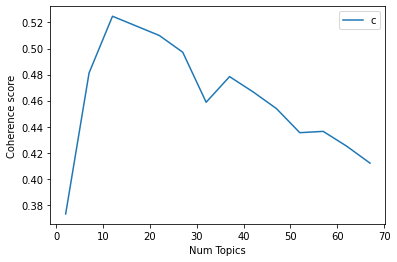

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Show graph
limit=70; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3731
Num Topics = 7  has Coherence Value of 0.4813
Num Topics = 12  has Coherence Value of 0.5247
Num Topics = 17  has Coherence Value of 0.5174
Num Topics = 22  has Coherence Value of 0.51
Num Topics = 27  has Coherence Value of 0.4972
Num Topics = 32  has Coherence Value of 0.4588
Num Topics = 37  has Coherence Value of 0.4784
Num Topics = 42  has Coherence Value of 0.4668
Num Topics = 47  has Coherence Value of 0.4539
Num Topics = 52  has Coherence Value of 0.4354
Num Topics = 57  has Coherence Value of 0.4364
Num Topics = 62  has Coherence Value of 0.4251
Num Topics = 67  has Coherence Value of 0.412


# optimal model generation

In [ ]:
from pprint import pprint
# Select the model and print the topics
optimal_model = model_list[4] # change it if need for optimal topics
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(2,
  '0.067*"doc" + 0.064*"html" + 0.039*"google" + 0.033*"entry" + '
  '0.028*"developer" + 0.027*"storage" + 0.023*"team" + 0.019*"global" + '
  '0.019*"readme" + 0.019*"external"'),
 (18,
  '0.024*"space" + 0.023*"people" + 0.022*"design" + 0.020*"layer" + '
  '0.017*"term" + 0.013*"free" + 0.013*"cell" + 0.010*"feedback" + '
  '0.010*"material" + 0.010*"goal"'),
 (3,
  '0.035*"python" + 0.035*"directory" + 0.024*"home" + 0.024*"running" + '
  '0.022*"root" + 0.022*"debug" + 0.018*"linux" + 0.016*"program" + '
  '0.015*"env" + 0.015*"machine"'),
 (12,
  '0.031*"location" + 0.030*"profile" + 0.030*"editor" + 0.025*"collection" + '
  '0.022*"category" + 0.019*"suggestion" + 0.015*"mod" + 0.013*"real" + '
  '0.013*"short" + 0.013*"world"'),
 (11,
  '0.027*"copy" + 0.025*"switch" + 0.021*"track" + 0.020*"card" + 0.018*"stop" '
  '+ 0.018*"medium" + 0.016*"share" + 0.015*"play" + 0.015*"clear" + '
  '0.013*"volume"'),
 (10,
  '0.029*"connection" + 0.027*"network" + 0.027*"password" + 0

In [ ]:
#checkpoint
import pickle
pickle.dump(optimal_model, open("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_ldamallet_topics.pkl", "wb"))

# save the optimal model

In [ ]:
import pandas as pd

In [ ]:
# also run the imports in previous cells if you load this in a new kernel.
import pickle
ldamallet_14 = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_ldamallet_topics.pkl", "rb"))

In [ ]:
tm_results = ldamallet_14[corpus]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet_14.show_topic(n, topn=20)] for n in range(0, ldamallet_14.num_topics)]
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet_14.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22
Term1,expected,cache,doc,python,warning,setting,structure,array,json,label,connection,copy,location,tree,java,api,generated,menu,space,back,master,git
Term2,browser,token,html,directory,net,php,pattern,rule,attribute,limit,network,switch,profile,testing,org,url,route,tab,people,branch,blob,png
Term3,question,login,google,home,src,auto,hash,int,var,background,password,track,editor,side,channel,response,definition,box,design,repository,original,cloud
Term4,language,day,entry,running,notification,admin,lot,count,flag,performance,port,card,collection,react,stream,session,defined,top,layer,graph,created,header
Term5,actual,auth,developer,root,cli,export,break,memory,argument,large,validation,stop,category,integration,android,endpoint,member,drop,term,repo,git,record


In [ ]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet_14.num_topics+1)] )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Terms per Topic
Topic1,"expected, browser, question, language, actual, reproduce, related, video, describe, additional, behaviour, angular, chrome, demo, summary, live, platform, latest, fill, visual"
Topic2,"cache, token, login, day, auth, transaction, register, sign, topic, meta, scope, authentication, total, stats, year, customer, join, refresh, credential, active"
Topic3,"doc, html, google, entry, developer, storage, team, global, readme, external, font, website, sync, guide, backend, usage, dashboard, hard, bundle, javascript"
Topic4,"python, directory, home, running, root, debug, linux, program, env, machine, installed, bin, shell, binary, installation, txt, apps, lib, found, zip"
Topic5,"warning, net, src, notification, cli, exception, static, stack, pack, plugins, loading, framework, lib, upgrade, logging, asset, common, helper, dynamic, generator"
Topic6,"setting, php, auto, admin, export, controller, provider, manager, cluster, disable, role, aws, enabled, permission, security, management, csv, yaml, policy, bounty"
Topic7,"structure, pattern, hash, lot, break, lab, avoid, extra, clean, ignore, reason, rename, checking, backup, exists, existing, batch, detect, removed, alias"
Topic8,"array, rule, int, count, memory, flow, range, operation, word, frame, chart, metric, byte, convert, buffer, operator, raw, matrix, dataset, cpu"
Topic9,"json, attribute, var, flag, argument, false, entity, schema, null, empty, foo, optional, print, character, max, console, const, callback, override, prefix"
Topic10,"label, limit, background, performance, large, small, speed, effect, random, high, rate, fast, scale, algorithm, low, score, turn, hit, increase, light"


# visualizations on optimal model

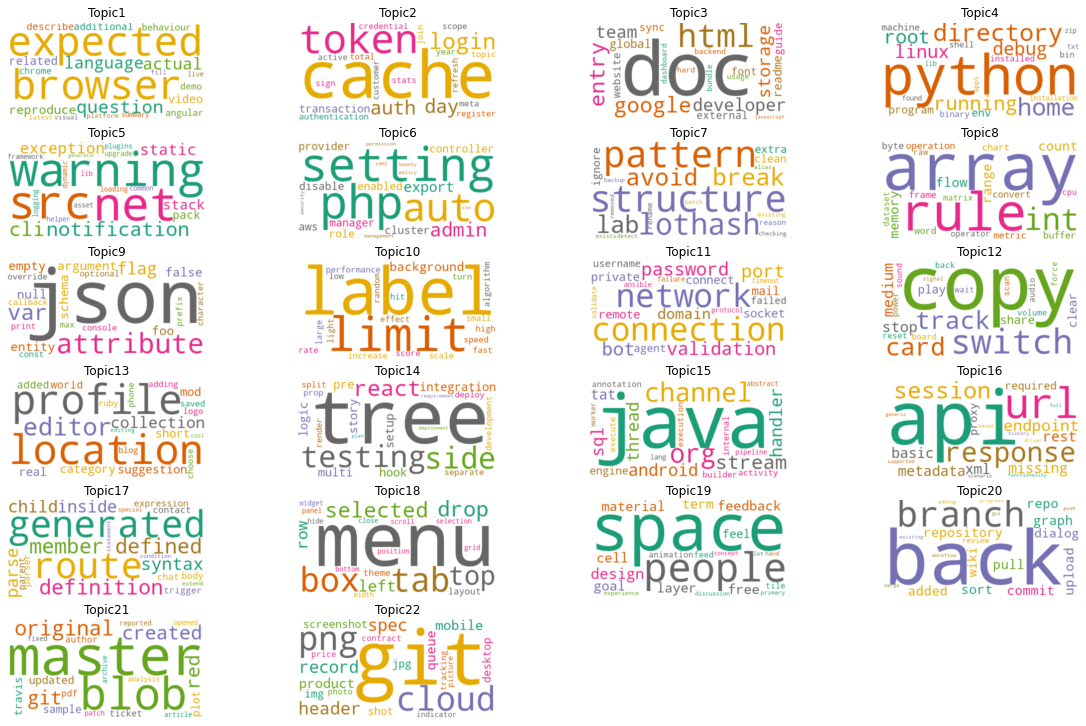

In [ ]:
# import wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(22):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(7, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
ldagensim = convertldaMalletToldaGen(ldamallet_14)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Text'] = SO_tag_filtered_nocode.text
corpus_topic_df['Id'] = SO_tag_filtered_nocode.Id
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

,Text,Id,Dominant Topic,Contribution %,Topic Terms
0,zoom piano roll zoom piano roll would useful,0,8,7.63,"array, rule, int, count, memory, flow, range, operation, word, frame, chart, metric, byte, convert, buffer, operator, raw, matrix, dataset, cpu"
1,auto update feature great job far saenz ramiro auto update feature would nice alternatively menu button check latest version manually,2,6,8.03,"setting, php, auto, admin, export, controller, provider, manager, cluster, disable, role, aws, enabled, permission, security, management, csv, yaml, policy, bounty"
2,filter noisy endpoint log think stop logging request health gtg favicon ico,3,20,7.30,"back, branch, repository, graph, repo, pull, upload, sort, added, commit, dialog, wiki, review, progress, push, adding, gui, merge, existing, workflow"
3,add translation beta release electron beta electron electron http git hub beta,6,4,9.09,"python, directory, home, running, root, debug, linux, program, env, machine, installed, bin, shell, binary, installation, txt, apps, lib, found, zip"
4,bot post listing periodically instead posting startup post bot stats called bot connects discord meaning server count update bot loses connection discord,8,11,17.82,"connection, network, password, port, validation, bot, domain, private, connect, remote, socket, mail, agent, failed, username, protocol, timeout, ansible, failure, validate"


In [ ]:
#predictions file
corpus_topic_df.to_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv')

In [ ]:
import numpy as np
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Perc
0,1,9667,4.66
1,2,12074,5.82
2,3,9783,4.72
3,4,10857,5.24
4,5,9683,4.67
5,6,9771,4.71
6,7,7377,3.56
7,8,10879,5.25
8,9,9263,4.47
9,10,12522,6.04


<BarContainer object of 22 artists>

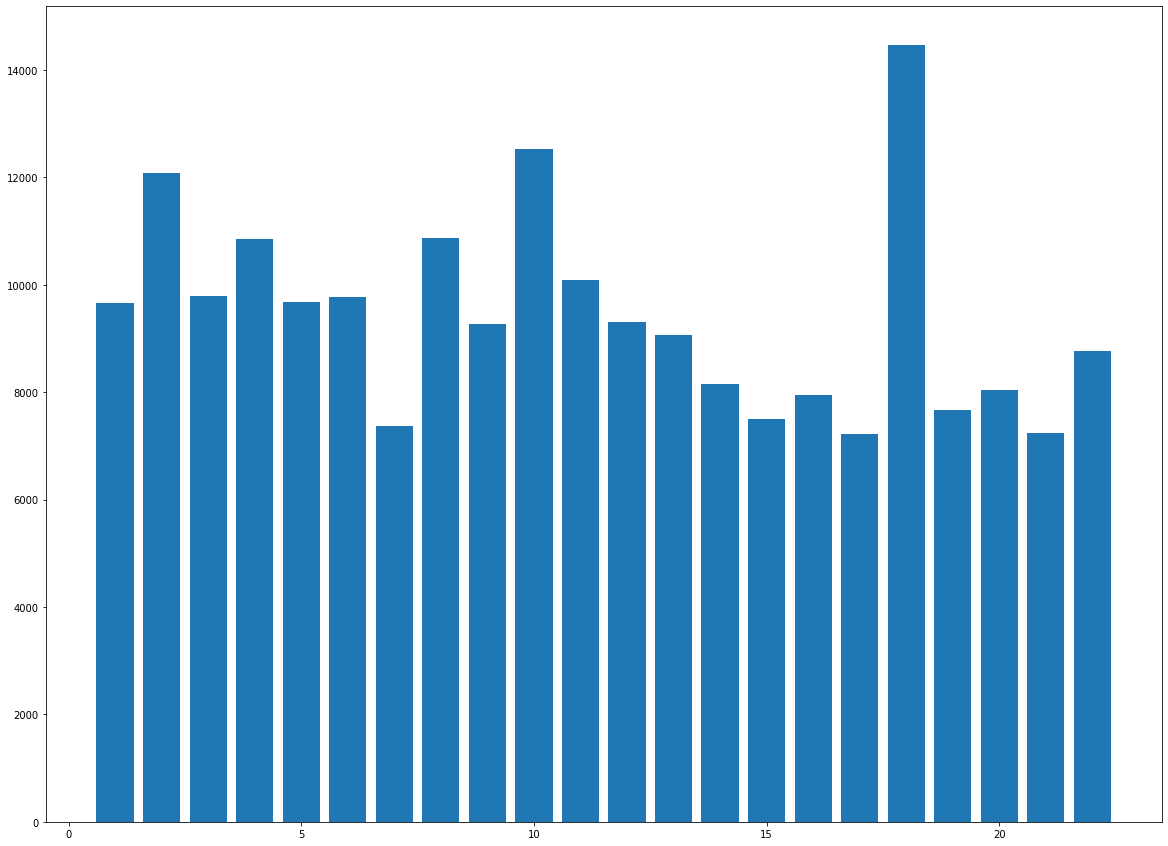

In [ ]:
plt.bar(x=dominant_topic_df['Dominant Topic'], height = dominant_topic_df['Doc_Count'])

In [ ]:
import pandas as pd
corpus_topic_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv')

In [ ]:
corpus_topic_df.tail(20)

,Unnamed: 0,Text,Id,Dominant Topic,Contribution %,Topic Terms
207298,207298,improve styling sign provider currently provider button replace corresponding icon instead,449953,6,7.71,"setting, php, auto, admin, export, controller, provider, manager, cluster, disable, role, aws, enabled, permission, security, management, csv, yaml, policy, bounty"
207299,207299,store state dark mode user preference stored memory,449955,8,6.68,"array, rule, int, count, memory, flow, range, operation, word, frame, chart, metric, byte, convert, buffer, operator, raw, matrix, dataset, cpu"
207300,207300,csv performance improvement order improve fast read csv report write reverse order filter today report stop reading,449957,10,7.81,"label, limit, background, performance, large, small, speed, effect, random, high, rate, fast, scale, algorithm, low, score, turn, hit, increase, light"
207301,207301,abstract upload adapter considering local http git hub com flag row upload blob master src adapter local php adapter accepts filesystem made abstract class new local adapter adapter extend abstract one,449959,15,14.94,"java, org, channel, stream, android, thread, handler, sql, tat, engine, activity, builder, internal, annotation, execution, execute, pipeline, lang, abstract, worker"
207302,207302,create licence mechanism create licencing mechanism enable trial version add competition registering app enable tracking registering app different user try share account different tournament organiser user must able install application different device different device,449960,2,10.83,"cache, token, login, day, auth, transaction, register, sign, topic, meta, scope, authentication, total, stats, year, customer, join, refresh, credential, active"
207303,207303,rerun test code changed via arthur all shire also would nice library could detect already run test particular code base using checksum run deploying trying run bit complex really want right since probably hash import probably doable time get anytime soon good idea,449963,7,8.56,"structure, pattern, hash, lot, break, lab, avoid, extra, clean, ignore, reason, rename, checking, backup, exists, existing, batch, detect, removed, alias"
207304,207304,new pre parse page hook function php possible add new hook function php page parsed hook could tweak thing like plugin,449965,14,10.63,"tree, testing, side, react, integration, setup, logic, story, pre, hook, multi, separate, render, split, development, prop, deploy, deployment, requirement, plan"
207305,207305,refactor speed computation interaction computed per user many time number item user interacted,449966,8,7.63,"array, rule, int, count, memory, flow, range, operation, word, frame, chart, metric, byte, convert, buffer, operator, raw, matrix, dataset, cpu"
207306,207306,connector fail load red broken connector drawn place author name peter nordin peter nordin original red mine issue http flume iei liu original date connector fail load red broken connector drawn place requires unconnected partially connected connector nice debugging model fails warning,449970,21,20.60,"master, blob, original, created, git, red, sample, updated, travis, plot, ticket, pdf, author, reported, fixed, article, analysis, patch, archive, opened"
207307,207307,add assignable modifier reduce duplication could nice reusable modifier javascript paging param page index param pagesize freetype paging param,449971,9,10.84,"json, attribute, var, flag, argument, false, entity, schema, null, empty, foo, optional, print, character, max, console, const, callback, override, prefix"


In [ ]:
# data_src = 'SE' # SO | SE
# data_src_urls = {
#     'SO': 'stackoverflow.com',
#     'SE': 'softwareengineering.stackexchange.com'
# }
df_lda = pd.read_csv(f"/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv")
print(f"{len(df_lda.index)} rows imported.")
df_lda = df_lda[['Id', 'Text', 'Dominant Topic', 'Contribution %', 'Topic Terms']]
# df_lda.insert(1, 'URL', f"https://{data_src_urls[data_src]}/questions/" + df_lda['Id'].astype(str) + '/')
# df_lda['IsDesign'] = ""
df_lda['Label'] = ""
df_lda.head()

207318 rows imported.


,Id,Text,Dominant Topic,Contribution %,Topic Terms,Label
0,0,zoom piano roll zoom piano roll would useful,8,7.63,"array, rule, int, count, memory, flow, range, operation, word, frame, chart, metric, byte, convert, buffer, operator, raw, matrix, dataset, cpu",
1,2,auto update feature great job far saenz ramiro auto update feature would nice alternatively menu button check latest version manually,6,8.03,"setting, php, auto, admin, export, controller, provider, manager, cluster, disable, role, aws, enabled, permission, security, management, csv, yaml, policy, bounty",
2,3,filter noisy endpoint log think stop logging request health gtg favicon ico,20,7.30,"back, branch, repository, graph, repo, pull, upload, sort, added, commit, dialog, wiki, review, progress, push, adding, gui, merge, existing, workflow",
3,6,add translation beta release electron beta electron electron http git hub beta,4,9.09,"python, directory, home, running, root, debug, linux, program, env, machine, installed, bin, shell, binary, installation, txt, apps, lib, found, zip",
4,8,bot post listing periodically instead posting startup post bot stats called bot connects discord meaning server count update bot loses connection discord,11,17.82,"connection, network, password, port, validation, bot, domain, private, connect, remote, socket, mail, agent, failed, username, protocol, timeout, ansible, failure, validate",


In [ ]:
#checkpoint
df_lda.to_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv',index=False)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_tag_filtered_nocode_LDA_predictions.csv')
test.head()

,Id,Text,Dominant Topic,Contribution %,Topic Terms,Label
0,0,zoom piano roll zoom piano roll would useful,8,7.63,"array, rule, int, count, memory, flow, range, operation, word, frame, chart, metric, byte, convert, buffer, operator, raw, matrix, dataset, cpu",NaN
1,2,auto update feature great job far saenz ramiro auto update feature would nice alternatively menu button check latest version manually,6,8.03,"setting, php, auto, admin, export, controller, provider, manager, cluster, disable, role, aws, enabled, permission, security, management, csv, yaml, policy, bounty",NaN
2,3,filter noisy endpoint log think stop logging request health gtg favicon ico,20,7.30,"back, branch, repository, graph, repo, pull, upload, sort, added, commit, dialog, wiki, review, progress, push, adding, gui, merge, existing, workflow",NaN
3,6,add translation beta release electron beta electron electron http git hub beta,4,9.09,"python, directory, home, running, root, debug, linux, program, env, machine, installed, bin, shell, binary, installation, txt, apps, lib, found, zip",NaN
4,8,bot post listing periodically instead posting startup post bot stats called bot connects discord meaning server count update bot loses connection discord,11,17.82,"connection, network, password, port, validation, bot, domain, private, connect, remote, socket, mail, agent, failed, username, protocol, timeout, ansible, failure, validate",NaN


In [ ]:
top = df_lda.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False))).reset_index(drop=True)
top.head(30)

Id  ... Label
0   343204  ...      
1   151784  ...      
2   355664  ...      
3   77069   ...      
4   34671   ...      
5   97509   ...      
6   23847   ...      
7   329125  ...      
8   103562  ...      
9   339490  ...      
10  178807  ...      
11  159190  ...      
12  429307  ...      
13  270487  ...      
14  362443  ...      
15  414942  ...      
16  168404  ...      
17  283387  ...      
18  293716  ...      
19  369547  ...      
20  281701  ...      
21  34494   ...      
22  130318  ...      
23  434497  ...      
24  318465  ...      
25  152392  ...      
26  19550   ...      
27  398960  ...      
28  237475  ...      
29  380977  ...      

[30 rows x 6 columns]

In [ ]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207318 entries, 0 to 207317
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              207318 non-null  int64  
 1   Text            207318 non-null  object 
 2   Dominant Topic  207318 non-null  int64  
 3   Contribution %  207318 non-null  float64
 4   Topic Terms     207318 non-null  object 
 5   Label           207318 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ MB


In [ ]:
top.to_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SO_top_answers.csv", index=False)

# generate samples of each topic for label naming




In [ ]:
lda = top.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False)))

In [ ]:
lda_1 = lda.reset_index(drop = True)

In [ ]:
lda_labelling = lda_1.groupby('Dominant Topic').head(10)
lda_labelling.tail(20)

,Id,Text,Dominant Topic,Contribution %,Topic Terms,Label
191311,55176,rename subroutine advance club forcings prescribe forcings trac test want result priority case bit bit identical change attachment plot explicit configs maff http git hub com larson group trac attachment archive blob master trac explicit configs maff plot new pdf config plot maff http git hub com larson group trac attachment archive blob master trac new pdf config plot maff plot combo pdf run maff http git hub com larson group trac attachment archive blob master trac combo pdf run maff plot input field maff http git hub com larson group trac attachment archive blob master trac input field maff plot new pdf test maff http git hub com larson group trac attachment archive blob master trac new pdf test maff plot attempt maff http git hub com larson group trac attachment archive blob master trac attempt maff plot attempt maff http git hub com larson group trac attachment archive blob master trac attempt maff plot beta maff http git hub com larson group trac attachment archive blob master trac beta maff plot beta maff http git hub com larson group trac attachment archive blob master trac beta maff migrated http carson math uwm json status closed change time description test want result priority case bit bit identical change reporter larson uwm edu larson uwm edu resolution fixed component club src summary rename subroutine advance club forcings prescribe forcings priority major keywords time milestone refactor club owner scheme uwm edu type enhancement,21,74.48,"master, blob, original, created, git, red, sample, updated, travis, plot, ticket, pdf, author, reported, fixed, article, analysis, patch, archive, opened",
191312,30011,consolidate alto source code trac alto case largely cut paste consolidate code subroutine attachment plot explicit configs maff http git hub com larson group trac attachment archive blob master trac explicit configs maff plot new pdf config plot maff http git hub com larson group trac attachment archive blob master trac new pdf config plot maff plot combo pdf run maff http git hub com larson group trac attachment archive blob master trac combo pdf run maff plot input field maff http git hub com larson group trac attachment archive blob master trac input field maff plot new pdf test maff http git hub com larson group trac attachment archive blob master trac new pdf test maff plot attempt maff http git hub com larson group trac attachment archive blob master trac attempt maff plot attempt maff http git hub com larson group trac attachment archive blob master trac attempt maff plot beta maff http git hub com larson group trac attachment archive blob master trac beta maff plot beta maff http git hub com larson group trac attachment archive blob master trac beta maff migrated http carson math uwm json status closed change time description alto case largely cut paste consolidate code subroutine reporter larson uwm edu dsc hanen uwm edu resolution verified larson component club src summary consolidate alto source code priority major keywords time milestone refactor club owner hoppe uwm edu type enhancement,21,73.54,"master, blob, original, created, git, red, sample, updated, travis, plot, ticket, pdf, author, reported, fixed, article, analysis, patch, archive, opened",
191313,367059,incorporate coef thl prcp coef rtp rcp standard plot gen panel trac introduction ticket added coef prcp plot gen plot ticket let add two similar variable coef thl prcp coef rtp rcp important component budget term wpt hlp rtp latter appears wrong sign club http git hub com larson group trac hence interest technical spec let create separate panel coef thl prcp separate panel coef rtp rcp want over plot club sam coamps coef http git hub com larson group trac sam http git hub com larson group trac coamps coamps qcp thp qcp sam need look appropriate variable the tal something like attachment plot explicit configs maff http git hub com larson group trac attachment archive bl

In [ ]:
lda_labelling.to_csv("/content/drive/MyDrive/ColabNotebooks/MscProj/Advanced/TM/SE_top_answers.csv", index=False)